In [1]:
# Referece: https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

In [74]:
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import math

In [75]:
geodata = gpd.read_file("chinaGeo.geojson")
print(geodata)

    id name  latitude  longitude  childNum  \
0   62   甘肃       NaN        NaN       NaN   
1   63   青海       NaN        NaN       NaN   
2   45   广西   23.7451   108.7560       NaN   
3   52   贵州   26.8033   106.5590       NaN   
4   50   重庆   30.0173   107.7300       NaN   
5   11   北京   39.9488   116.3890       NaN   
6   35   福建   26.4080   118.1780       NaN   
7   34   安徽   31.9537   117.2530       NaN   
8   44   广东   23.7924   113.7200       NaN   
9   54   西藏   31.4515    88.4137       NaN   
10  65   新疆   41.1220    85.4253       NaN   
11  46   海南   19.1865   109.8250       NaN   
12  64   宁夏   37.1762   106.0380       NaN   
13  61   陕西   33.7713   108.3630       NaN   
14  14   山西   37.7586   112.3890       NaN   
15  42   湖北   30.9857   112.2640       NaN   
16  43   湖南   27.6667   111.7120       NaN   
17  51   四川   30.5431   102.3840       NaN   
18  53   云南   24.4603   101.6610       NaN   
19  13   河北   38.5205   115.3140       NaN   
20  41   河南   33.9055   113.4840  

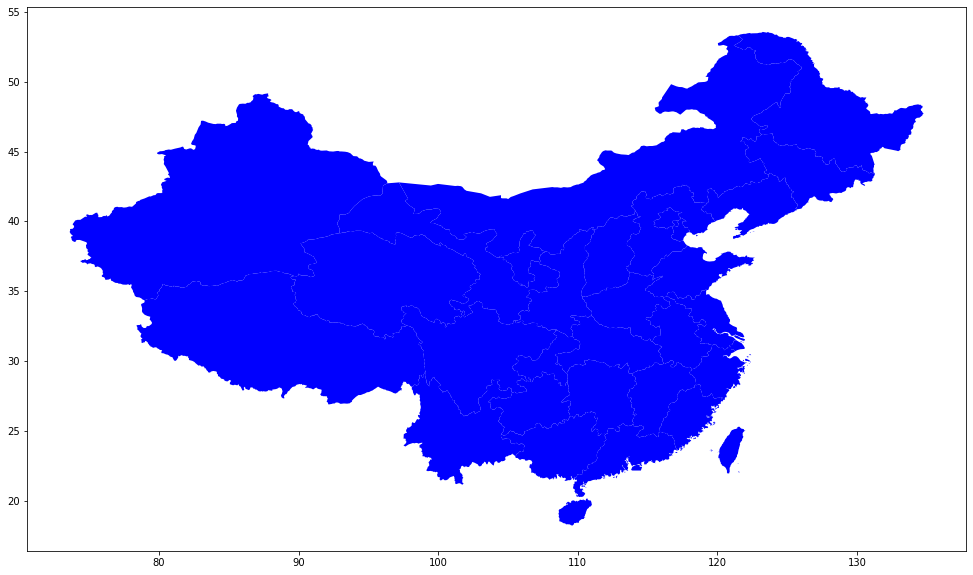

In [76]:
# Plot Geojson with Matplot lib
plt.rcParams['figure.figsize'] = (20, 10)
ax = geodata.plot(color = 'blue')

In [16]:
# fig, ax = plt.subplots(figsize = (15,15))
# geoData.plot(ax = ax)

In [77]:
###### Random points generator
def get_inscribedCircle_radius(center, polygon): 
    shapely_point = Point(center[0], center[1])
    return polygon.exterior.distance(shapely_point)

def get_circlePoints_with_inscreaseNum(center, radius, radius_interval, distance, increase):
    points = []
    numPoints = 0 
    # for r in range(radius_interval, radius, radius_interval):
    for r in np.arange(radius_interval, radius, radius_interval):
        numPoints += increase 
        # print(numPoints)
        base_angle = 360/ numPoints
        # print(base_angle)
        for i in range(0, numPoints): 
            angle = base_angle * i
            # print(angle)
            point_x = center[0] + r * math.cos(angle* math.pi/ 180) * distance 
            point_y = center[1] + r * math.sin(angle* math.pi/ 180) * distance 
            points.append([point_x, point_y])
    return points
            

    
def random_points_in_polygon(number, polygon):
    points = []
    min_x, min_y, max_x, max_y = polygon.bounds
    i= 0
    while i < number:
        # Triangular distribution 
        point = Point(np.random.triangular(min_x,(max_x + min_x)/2 ,max_x),  np.random.triangular(min_y, min_y+ (max_y - min_y)/4,max_y))
        # normal distribution 
        # point = Point((max_x - min_x)*np.random.normal(0, 1),  (max_y - min_y)*np.random.normal(0, 1))
        if polygon.contains(point):
            points.append(point)
            i += 1
    return points  # returns list of shapely point


In [67]:
def get_coords(point):
    coords = [] 
    coords.append(point.x)
    coords.append(point.y)
    return coords

In [90]:
polygon_data = geodata.iloc[16].geometry
point = random_points_in_polygon(1, polygon_data)
center_coords = get_coords(point[0])
inscribed_radius = get_inscribedCircle_radius(center_coords, polygon_data)
print(center_coords, inscribed_radius)
circle_points = get_circlePoints_with_inscreaseNum(center_coords, 1, 0.05,          1,   10)
#               get_circlePoints_with_inscreaseNum(center,        radius,           radius_interval,distance,increase = 10)
print(circle_points)
# get_circlePoints_with_inscreaseNum(center_coords, inscribed_radius, 0.05, 0.001, increase = 10)

[110.62290619089003, 27.14588319214015] 0.8074363795703685
[[110.67290619089003, 27.14588319214015], [110.66335704060879, 27.175272454754776], [110.63835704060878, 27.19343601795491], [110.60745534117129, 27.19343601795491], [110.58245534117128, 27.175272454754776], [110.57290619089004, 27.14588319214015], [110.58245534117128, 27.116493929525525], [110.60745534117129, 27.098330366325392], [110.63835704060878, 27.098330366325392], [110.66335704060879, 27.116493929525525], [110.72290619089003, 27.14588319214015], [110.71801184251954, 27.176784891577647], [110.70380789032752, 27.204661717369397], [110.68168471611928, 27.226784891577644], [110.65380789032753, 27.240988843769667], [110.62290619089003, 27.245883192140152], [110.59200449145254, 27.240988843769667], [110.56412766566079, 27.226784891577644], [110.54200449145254, 27.204661717369397], [110.52780053926053, 27.176784891577647], [110.52290619089004, 27.14588319214015], [110.52780053926053, 27.114981492702654], [110.54200449145254, 2

In [32]:
geo_df = gpd.GeoDataFrame(geometry = points)

NameError: name 'points' is not defined

In [45]:
geo_df.head()

,geometry
0,POINT (111.69249 29.15072)
1,POINT (112.45279 25.66451)
2,POINT (110.61370 28.76632)
3,POINT (111.98464 25.94922)
4,POINT (112.53917 25.32234)


In [44]:
x_coords = geo_df.geometry.x.array
y_coords = geo_df.geometry.y.array
print(x_coords, y_coords)

NameError: name 'geo_df' is not defined

In [45]:
newDf = pd.DataFrame(data = {'Longitude': x_coords, 'Latitude': y_coords} )
print(newDf)

NameError: name 'x_coords' is not defined

In [49]:
newDf.to_csv('random.csv')

In [91]:
## export circle_points to csv 
print(circle_points)

[[110.67290619089003, 27.14588319214015], [110.66335704060879, 27.175272454754776], [110.63835704060878, 27.19343601795491], [110.60745534117129, 27.19343601795491], [110.58245534117128, 27.175272454754776], [110.57290619089004, 27.14588319214015], [110.58245534117128, 27.116493929525525], [110.60745534117129, 27.098330366325392], [110.63835704060878, 27.098330366325392], [110.66335704060879, 27.116493929525525], [110.72290619089003, 27.14588319214015], [110.71801184251954, 27.176784891577647], [110.70380789032752, 27.204661717369397], [110.68168471611928, 27.226784891577644], [110.65380789032753, 27.240988843769667], [110.62290619089003, 27.245883192140152], [110.59200449145254, 27.240988843769667], [110.56412766566079, 27.226784891577644], [110.54200449145254, 27.204661717369397], [110.52780053926053, 27.176784891577647], [110.52290619089004, 27.14588319214015], [110.52780053926053, 27.114981492702654], [110.54200449145254, 27.087104666910903], [110.56412766566079, 27.064981492702657

In [92]:
x_coords_arr = []
y_coords_arr = []
for i in range( len(circle_points) ):
    x_coords_arr.append( circle_points[i][0] )
    y_coords_arr.append( circle_points[i][1] )
circle_points_df = pd.DataFrame(data = {'Longitude': x_coords_arr, 'Latitude': y_coords_arr} )
print(circle_points_df)
    

       Longitude   Latitude
0     110.672906  27.145883
1     110.663357  27.175272
2     110.638357  27.193436
3     110.607455  27.193436
4     110.582455  27.175272
...          ...        ...
1895  111.559949  26.989518
1896  111.564607  27.020586
1897  111.568235  27.051790
1898  111.570829  27.083097
1899  111.572387  27.114473

[1900 rows x 2 columns]


In [94]:
circle_points_df.to_csv('religious_sites_circle_random.csv')